In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn wordcloud selenium
!pip install webdriver-manager

Unable to create process using 'C:\Users\Humayun Raza\anaconda3\python.exe "C:\Users\Humayun Raza\anaconda3\Scripts\pip-script.py" install pandas numpy matplotlib seaborn scikit-learn wordcloud selenium'
Unable to create process using 'C:\Users\Humayun Raza\anaconda3\python.exe "C:\Users\Humayun Raza\anaconda3\Scripts\pip-script.py" install webdriver-manager'


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from wordcloud import WordCloud

from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from selenium.webdriver.common.actions.wheel_input import ScrollOrigin
from selenium.common.exceptions import ElementClickInterceptedException, ElementNotInteractableException, StaleElementReferenceException


import nltk
nltk.download('vader_lexicon')
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import silhouette_score

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Web Scrapping

In [42]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.actions.wheel_input import ScrollOrigin
from selenium.common.exceptions import ElementClickInterceptedException, ElementNotInteractableException, StaleElementReferenceException

filename = "data"
link = "https://www.google.com/maps/search/fast+food+in+Lahore/@31.4733143,74.213001,13z/data=!3m1!4b1?entry=ttu&g_ep=EgoyMDI0MTAyNy4wIKXMDSoASAFQAw%3D%3D"


browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
record = []
e = []  # Initialize the list to track unique names

def Selenium_extractor():
    action = ActionChains(browser)
    max_scroll_attempts = 50  # Maximum number of scroll attempts
    scroll_attempts = 0
    last_count = 0
    no_change_count = 0

    while scroll_attempts < max_scroll_attempts:
        a = browser.find_elements(By.CLASS_NAME, "hfpxzc")
        print(f"Number of results found so far: {len(a)}")

        if len(a) >= 1000 or no_change_count >= 10:
            break

        scroll_origin = ScrollOrigin.from_element(a[-1])
        action.scroll_from_origin(scroll_origin, 0, 1000).perform()
        time.sleep(2)
        scroll_attempts += 1

        if len(a) == last_count:
            no_change_count += 1
        else:
            no_change_count = 0

        last_count = len(a)

    processed_count = 0
    for i in range(min(20, len(a))):  # Process up to 20 results
        if processed_count >= 10:  # Stop after processing 10 results
            break

        scroll_origin = ScrollOrigin.from_element(a[i])
        action.scroll_from_origin(scroll_origin, 0, 100).perform()
        action.move_to_element(a[i]).perform()

        try:
            a[i].click()
        except ElementClickInterceptedException:
            browser.execute_script("arguments[0].click();", a[i])
        except (ElementNotInteractableException, StaleElementReferenceException) as ex:
            print(f"Skipping element {i} due to error: {ex}")
            continue

        time.sleep(2)
        source = browser.page_source
        soup = BeautifulSoup(source, 'html.parser')

        try:
            # Extract restaurant name
            Name_Html = soup.findAll('h1', {"class": "DUwDvf lfPIob"})
            name = Name_Html[0].text if Name_Html else "Name not found"

            if name not in e:
                e.append(name)  # Track names to avoid duplicates

                divs = soup.findAll('div', {"class": "Io6YTe fontBodyMedium kR99db"})
                phone = "Phone not available"
                for j in range(len(divs)):
                    if str(divs[j].text).startswith("+"):
                        phone = divs[j].text
                        break

                address = divs[0].text if divs else "Address not available"

                website = "Website not available"
                for z in range(len(divs)):
                    if "." in divs[z].text[-4:]:
                        website = divs[z].text
                        break

                # Extract reviews
                reviews = []
                review_names = soup.findAll('div', {"class": "d4r55"})  # Reviewer names
                review_texts = soup.findAll('div', {"class": "wiI7pd"})  # Review texts

                for rev_name, rev_text in zip(review_names, review_texts):
                    reviewer = rev_name.text.strip()
                    review_content = rev_text.text.strip()
                    reviews.append(f"{reviewer}: {review_content}")

                # Append the extracted data to the record list
                record.append((name, phone, address, website, reviews))
                processed_count += 1
                print(f"Processed record {processed_count}: {name}")

        except Exception as ex:
            print(f"Error: {ex}")
            continue

    return processed_count  # Return the number of records processed

total_records = 0
for iteration in range(5):  # Reduce to 5 iterations for testing
    browser.get(link)
    time.sleep(10)
    records_processed = Selenium_extractor()
    total_records += records_processed
    print(f"Iteration {iteration + 1} completed. Total records: {total_records}")
    time.sleep(1)

    if total_records >= 50:  # Stop if we've collected 50 or more records
        break

df = pd.DataFrame(record, columns=['Name', 'Phone number', 'Address', 'Website', 'Reviews'])
df.to_csv(f"{filename}.csv", index=False, encoding='utf-8')

browser.quit()
print(f'Data saved to {filename}.csv. Total records: {total_records}')

WebDriverException: Message: unknown error: cannot find Chrome binary
Stacktrace:
#0 0x58feaf5344e3 <unknown>
#1 0x58feaf263c76 <unknown>
#2 0x58feaf28a757 <unknown>
#3 0x58feaf289029 <unknown>
#4 0x58feaf2c7ccc <unknown>
#5 0x58feaf2c747f <unknown>
#6 0x58feaf2bede3 <unknown>
#7 0x58feaf2942dd <unknown>
#8 0x58feaf29534e <unknown>
#9 0x58feaf4f43e4 <unknown>
#10 0x58feaf4f83d7 <unknown>
#11 0x58feaf502b20 <unknown>
#12 0x58feaf4f9023 <unknown>
#13 0x58feaf4c71aa <unknown>
#14 0x58feaf51d6b8 <unknown>
#15 0x58feaf51d847 <unknown>
#16 0x58feaf52d243 <unknown>
#17 0x7eff974b5ac3 <unknown>


## Load and Preprocessing

In [ ]:
# Load the dataset
df = pd.read_csv('/content/reviewsLocs.csv')
df.head()

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

In [ ]:
# Replace invalid cuisine types with 'Unknown'
df['FoodType'] = df['FoodType'].replace([
    '0 min', '21195 min', '21225 min', '21175 min',
    '21190 min', '21205 min', '21220 min', '21170 min',
    '21185 min', '21155 min'
], 'Unknown')

df.dropna(subset=['CompleteStoreName', 'FoodType'], inplace=True)
df.info()

In [ ]:
# Convert columns to appropriate types
df['text'] = df['text'].astype(str)
df['FoodType'] = df['FoodType'].astype(str)
df['Location'] = df['Location'].astype(str)
df.dtypes.head()

In [ ]:
data = pd.read_csv("/content/reviewsLocs.csv")

if 'Location' not in data.columns or 'CompleteStoreName' not in data.columns:
    print("The dataset must contain 'Location' and 'CompleteStoreName' columns.")
    exit()

unique_towns = data['Location'].unique()

print(f"Total unique towns with restaurant reviews: {len(unique_towns)}")

print("\nUnique towns and their restaurants:")
for town in unique_towns:
    restaurants = data[data['Location'] == town]['CompleteStoreName'].unique()
    print(f"\nTown: {town}")
    print(f"Total Restaurants: {len(restaurants)}")
    print(f"Restaurants: {', '.join(restaurants)}")


## Data Wrangling and Transformation

In [ ]:
# Encode categorical variables
le = LabelEncoder()
df['FoodType_Encoded'] = le.fit_transform(df['FoodType'])

# Normalize the 'AverageRating' column
scaler = MinMaxScaler()
df['AverageRating_Normalized'] = scaler.fit_transform(df[['AverageRating']])
print("\nNormalized Ratings Sample:")
print(df[['AverageRating', 'AverageRating_Normalized']].head())

In [ ]:
print("\nCleaned Dataset:")
df

In [ ]:
# Group data by restaurant and aggregate necessary fields
restaurant_summary = df.groupby('CompleteStoreName').agg({
    'FoodType': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown',
    'AverageRating': 'mean',
    'Reviewers': 'first',
    'Location': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown',
    'text': lambda x: ' '.join(x.dropna().astype(str)),
    'overall': 'mean'
}).reset_index()

In [ ]:
print("\nRestaurant Summary Sample:")
restaurant_summary.head()

# Data Exploration

In [ ]:
# Cuisine Distribution
plt.figure(figsize=(12, 6))
restaurant_summary['FoodType'].value_counts().plot(kind='bar')
plt.title('Distribution of Restaurants by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Review Sentiment Analysis
df['sentiment'] = df['overall'].map({1: 'Negative', 2: 'Neutral', 3: 'Neutral', 4: 'Positive', 5: 'Positive'})
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Review Sentiment Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# Create a TF-IDF matrix for restaurant reviews
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(restaurant_summary['text'].fillna(''))

cosine_sim = cosine_similarity(tfidf_matrix)

def get_content_recommendations(restaurant_name, top_n=5):
    idx = restaurant_summary[restaurant_summary['CompleteStoreName'] == restaurant_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_restaurants = sim_scores[1:top_n+1]
    return [restaurant_summary.iloc[i[0]]['CompleteStoreName'] for i in top_restaurants]

In [ ]:
# Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(restaurant_summary['AverageRating'], kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Cuisine Popularity by Top 10 Locations
top_locations = restaurant_summary['Location'].value_counts().head(10).index
filtered_data = restaurant_summary[restaurant_summary['Location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='Location', hue='FoodType', palette='viridis')

plt.title('Cuisine Popularity by Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Count')

plt.legend(title='Cuisine Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Word Cloud for Review Text
text = ' '.join(restaurant_summary['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Reviews')
plt.show()

In [ ]:
# Ratings by Cuisine Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=restaurant_summary, x='FoodType', y='AverageRating', palette='Set2')
plt.title('Distribution of Ratings by Cuisine')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
user_restaurant_ratings = df.pivot_table(
    index='reviewerId',
    columns='CompleteStoreName',
    values='overall',
    fill_value=0
)

# Function for collaborative filtering recommendations
def get_collaborative_recommendations(restaurant_name, top_n=5):
    restaurant_ratings = user_restaurant_ratings[restaurant_name]
    high_rating_users = restaurant_ratings[restaurant_ratings >= 4].index
    recommended_restaurants = []
    for user in high_rating_users:
        user_top_restaurants = user_restaurant_ratings.loc[user].nlargest(top_n).index.tolist()
        recommended_restaurants.extend(user_top_restaurants)
    recommended_restaurants = list(set(recommended_restaurants) - {restaurant_name})
    return recommended_restaurants[:top_n]

In [ ]:
cuisines = restaurant_summary['FoodType'].unique()

for selected_cuisine in cuisines:
    print(f"\nRecommended Restaurants for Cuisine: {selected_cuisine}")

    restaurants_in_cuisine = restaurant_summary[restaurant_summary['FoodType'] == selected_cuisine]
    sample_restaurant = restaurants_in_cuisine['CompleteStoreName'].iloc[0]

    # content-based recommendations
    print(f"\nContent-Based Recommendations for {sample_restaurant}:")
    content_recommendations = get_content_recommendations(sample_restaurant)
    for i, restaurant in enumerate(content_recommendations, 1):
        restaurant_data = restaurant_summary[restaurant_summary['CompleteStoreName'] == restaurant].iloc[0]
        print(f"{i}. {restaurant} - Location: {restaurant_data['Location']}")

    # collaborative filtering recommendations
    print(f"\nCollaborative Filtering Recommendations for {sample_restaurant}:")
    collab_recommendations = get_collaborative_recommendations(sample_restaurant)
    for i, restaurant in enumerate(collab_recommendations, 1):
        restaurant_data = restaurant_summary[restaurant_summary['CompleteStoreName'] == restaurant].iloc[0]
        print(f"{i}. {restaurant} - Location: {restaurant_data['Location']}")


In [ ]:
# Get unique town names
unique_towns = data['Location'].unique()

geolocator = Nominatim(user_agent="geoapi")

def get_lat_long(town):
    try:
        location = geolocator.geocode(f"{town}, Lahore, Pakistan")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error fetching location for {town}: {e}")
        return None, None

town_coordinates = {}

# Fetch latitude and longitude for each town
for town in unique_towns:
    print(f"Fetching coordinates for: {town}")
    lat, lon = get_lat_long(town)
    town_coordinates[town] = (lat, lon)
    time.sleep(1)  # Adding delay to avoid API rate limits

coordinates_df = pd.DataFrame.from_dict(town_coordinates, orient='index', columns=['Latitude', 'Longitude'])
coordinates_df.reset_index(inplace=True)
coordinates_df.rename(columns={'index': 'Town'}, inplace=True)

coordinates_df.to_csv("town_coordinates.csv", index=False)

print("\nLatitude and Longitude fetched successfully!")
print(coordinates_df)


In [ ]:
!pip install scikit-learn --upgrade

import pandas as pd
from sklearn.metrics import (
    confusion_matrix, classification_report, mean_squared_error,
    mean_absolute_error, r2_score, accuracy_score, precision_score,
    recall_score, f1_score, ConfusionMatrixDisplay
)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from geopy.distance import geodesic
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Fetching User's Location
def fetch_user_location():
    user_lat = 31.4645821  # Example: Lahore coordinates
    user_lon = 74.2563626
    return (user_lat, user_lon)

In [ ]:
# Getting Closest Town Based on User's Location
def get_closest_town(user_location, town_coordinates):
    closest_town = None
    min_distance = float('inf')

    for _, row in town_coordinates.iterrows():
        if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
            town_location = (row['Latitude'], row['Longitude'])
            distance = geodesic(user_location, town_location).kilometers
            if distance < min_distance:
                min_distance = distance
                closest_town = row['Town']

    return closest_town

## Sentiment Analysis

In [ ]:
# Sentiment Analysis and Ranking Restaurants
def analyze_sentiment_and_rank(filtered_data):
    sid = SentimentIntensityAnalyzer()

    filtered_data['text'] = filtered_data['text'].astype(str)

    # Analyze sentiment of reviews
    filtered_data['SentimentScore'] = filtered_data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

    # Ranking restaurants based on weighted score (70% rating + 30% sentiment)
    filtered_data['WeightedScore'] = (
        filtered_data['AverageRating'] * 0.7 + filtered_data['SentimentScore'] * 0.3
    )

    recommended_restaurants = filtered_data.drop_duplicates(subset=['CompleteStoreName'], keep='first')
    recommended_restaurants = recommended_restaurants.sort_values(by=['WeightedScore', 'AverageRating'], ascending=False)

    return recommended_restaurants

In [ ]:
def filter_restaurants(data, detected_town, food_type_input):
    filtered_data = data[
        (data['Location'].str.contains(detected_town, case=False)) &
        (data['FoodType'].str.contains(food_type_input, case=False))
    ]

    return filtered_data

### Evaluating Sentiment Analysis

In [ ]:
def evaluate_sentiment(filtered_data):
    if 'SentimentTrue' in filtered_data.columns and not filtered_data.empty:
        y_true = filtered_data['SentimentTrue']
        y_pred = filtered_data['SentimentScore'].apply(lambda x: 'positive' if x > 0 else 'negative')

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, pos_label='positive')
        recall = recall_score(y_true, y_pred, pos_label='positive')
        f1 = f1_score(y_true, y_pred, pos_label='positive')

        print("\nClassification Metrics:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")

        ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
        plt.show()
    else:
        print("Sentiment evaluation skipped: 'SentimentTrue' column is missing or no data after filtering.")


In [ ]:
def evaluate_ratings(filtered_data):
    if 'PredictedRating' in filtered_data.columns and 'AverageRating' in filtered_data.columns and not filtered_data.empty:
        y_true = filtered_data['AverageRating']
        y_pred = filtered_data['PredictedRating']

        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        print("\nRegression Metrics:")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"R2 Score: {r2:.2f}")
    else:
        print("Regression evaluation skipped: Necessary columns are missing or no data after filtering.")


In [ ]:
def plot_top_restaurants(recommended_restaurants, top_n=10):
    top_restaurants = recommended_restaurants.head(top_n)

    plt.figure(figsize=(12, 6))
    plt.barh(top_restaurants['CompleteStoreName'], top_restaurants['WeightedScore'], color='skyblue')
    plt.title(f"Top {top_n} Recommended Restaurants Based on Weighted Score")
    plt.xlabel('Weighted Score')
    plt.ylabel('Restaurant Name')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

User's location: (31.4645821, 74.2563626)
Enter food type: Pakistani


<ipython-input-30-6792198a64a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['text'] = filtered_data['text'].astype(str)
<ipython-input-30-6792198a64a2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['SentimentScore'] = filtered_data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
<ipython-input-30-6792198a64a2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Classification Metrics:
Accuracy: 0.33
Precision: 1.00
Recall: 0.33
F1 Score: 0.49


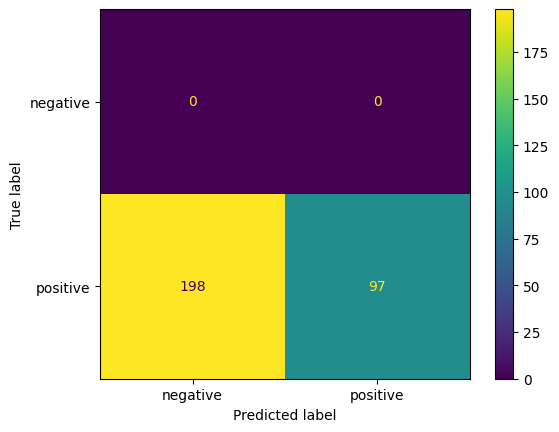

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  # consistently return the same eager evaluated value.



Regression Metrics:
RMSE: 0.39
MAE: 0.39
R2 Score: -68.76


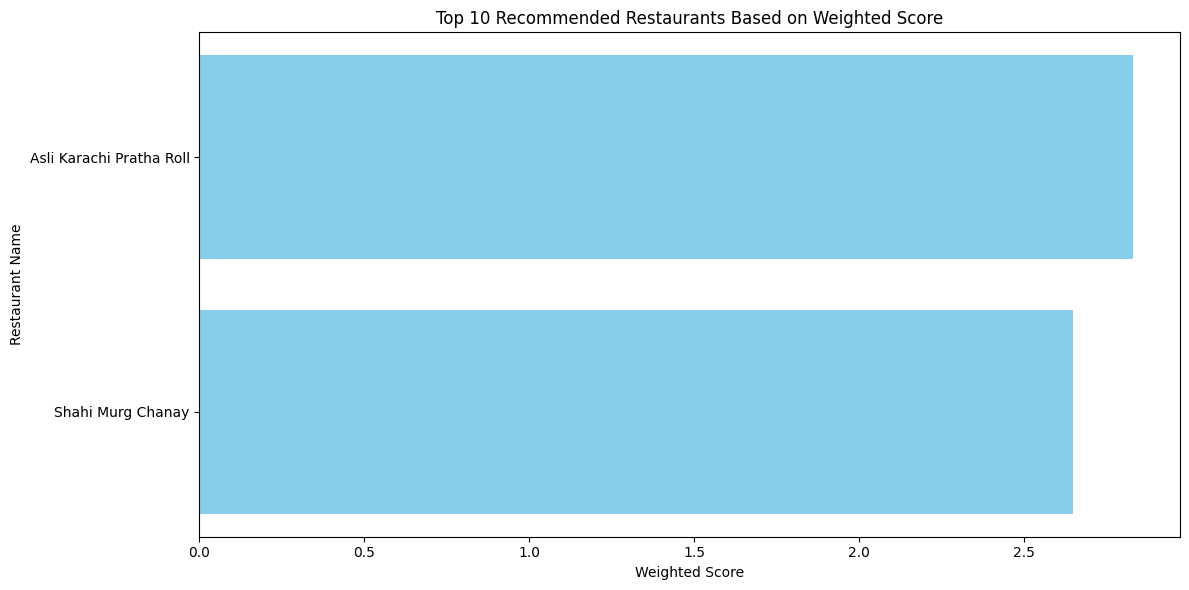

In [35]:
def main():
    data = pd.read_csv("/content/reviewsLocs.csv")

    # Load coordinates of towns in Lahore
    town_coordinates = pd.read_csv("town_coordinates.csv")
    town_coordinates = town_coordinates.dropna(subset=['Latitude', 'Longitude'])

    # Simulate columns for testing (replace with actual data in production)
    data['SentimentTrue'] = data['AverageRating'].apply(lambda x: 'positive' if x > 3 else 'negative')
    data['PredictedRating'] = data['AverageRating'] + (data['AverageRating'] * 0.1)

    # Fetch user's location
    user_location = fetch_user_location()
    print(f"User's location: {user_location}")

    # Determine closest town
    detected_town = get_closest_town(user_location, town_coordinates)

    if not detected_town:
        print("Unable to detect a nearby town. Please enter your town manually.")
        detected_town = input("Enter your town: ").strip()

    # Get user input for food type
    food_type_input = input("Enter food type: ").strip()


    # Filter restaurants
    filtered_data = filter_restaurants(data, detected_town, food_type_input)

    # Analyze sentiment and rank restaurants
    recommended_restaurants = analyze_sentiment_and_rank(filtered_data)

    # Evaluate sentiment and regression
    evaluate_sentiment(filtered_data)
    evaluate_ratings(filtered_data)

    # Plot top recommendations
    plot_top_restaurants(recommended_restaurants)

if __name__ == "__main__":
    main()